# British Airways Review Scraping & Analysis

This project scrapes British Airway customer feedback from a third-party source, Skytrax and analyses this data to understand customer feelings and needs.

## Import Libraries

In [38]:
# Importing Necessary Libraries

!pip install wordcloud

!pip install bs4
!pip install requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm

import requests
from bs4 import BeautifulSoup
import pandas as pd

## Web scraping

I will use `BeautifulSoup` to scrape data on British Airway reviews from [https://www.airlinequality.com/airline-reviews/british-airways] into a '.csv' file for further analysis with python


In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
page_total = 40
page_size = 100

customer_reviews,i = [],1

while i <= page_total:
    print(f"Scraping page {i}...")

    # Create URL for subsequent pages following base url
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Request data from page
    html_request = requests.get(url)

    #Parsing content
    parsed_data = BeautifulSoup(html_request.content, 'html.parser')
    customer_reviews.extend([el.get_text() for el in parsed_data.select('div.text_content')])

    print(f"  --> {len(customer_reviews)} total reviews")
    i += 1

Scraping page 1...
  --> 100 total reviews
Scraping page 2...
  --> 200 total reviews
Scraping page 3...
  --> 300 total reviews
Scraping page 4...
  --> 400 total reviews
Scraping page 5...
  --> 500 total reviews
Scraping page 6...
  --> 600 total reviews
Scraping page 7...
  --> 700 total reviews
Scraping page 8...
  --> 800 total reviews
Scraping page 9...
  --> 900 total reviews
Scraping page 10...
  --> 1000 total reviews
Scraping page 11...
  --> 1100 total reviews
Scraping page 12...
  --> 1200 total reviews
Scraping page 13...
  --> 1300 total reviews
Scraping page 14...
  --> 1400 total reviews
Scraping page 15...
  --> 1500 total reviews
Scraping page 16...
  --> 1600 total reviews
Scraping page 17...
  --> 1700 total reviews
Scraping page 18...
  --> 1800 total reviews
Scraping page 19...
  --> 1900 total reviews
Scraping page 20...
  --> 2000 total reviews
Scraping page 21...
  --> 2100 total reviews
Scraping page 22...
  --> 2200 total reviews
Scraping page 23...
  --> 23

In [ ]:
len(customer_reviews)

3938

In [ ]:
review_df = pd.DataFrame()
review_df["reviews"] = customer_reviews
review_df.head()

,reviews
0,✅ Trip Verified | We are extremely grateful ...
1,✅ Trip Verified | I had an appalling experie...
2,"Not Verified | Good points, the cabin crew, t..."
3,"Not Verified | It was a decent flight, reason..."
4,✅ Trip Verified | I really like flying Briti...


In [ ]:
# Saving the resulting dataframe to a csv file
review_df.to_csv("BA_reviews.csv")

## Data Cleaning & Preprocessing

In [109]:
review_df = pd.read_csv("BA_reviews.csv")
review_df.drop(columns=['Unnamed: 0'], inplace=True)
review_df.head()

,reviews
0,✅ Trip Verified | Flight mainly let down by ...
1,✅ Trip Verified | Another awful experience b...
2,"✅ Trip Verified | The service was rude, full..."
3,✅ Trip Verified | This flight was a joke. Th...
4,✅ Trip Verified | This time British Airways ...


The collected data contains purely text and string characters so would have to undergo cleaning and preprocessing

In [39]:
# Import data cleaning libraries

import re
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')
from nltk.corpus import stopwords
from wordcloud import WordCloud

from nltk import bigrams, trigrams

from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


First, we will get rid of instances of '✅ Trip Verified', '✅ Verified Review', 'Not Verified' and 'Unverified'

In [111]:
review_df[review_df['reviews'].str.contains('verified', case=False, na=False)]

,reviews
0,✅ Trip Verified | Flight mainly let down by ...
1,✅ Trip Verified | Another awful experience b...
2,"✅ Trip Verified | The service was rude, full..."
3,✅ Trip Verified | This flight was a joke. Th...
4,✅ Trip Verified | This time British Airways ...
...,...
2568,✅ Verified Review | Istanbul to London Heathr...
2569,✅ Verified Review | London Heathrow to Housto...
2570,✅ Verified Review | We have flown with Britis...
2571,✅ Verified Review | British Airways from Seat...


In [112]:
# Removing instances of 'verified'
review_df['reviews'] = review_df['reviews'].str.replace('Trip Verified', '')
review_df['reviews'] = review_df['reviews'].str.replace('Not Verified', '')
review_df['reviews'] = review_df['reviews'].str.replace('Verified Review', '')
review_df['reviews'] = review_df['reviews'].str.replace('Unverified', '')
review_df['reviews'] = review_df['reviews'].str.replace('✅', '')
review_df['reviews'] = review_df['reviews'].str.replace('|', '')
review_df.head()

,reviews
0,Flight mainly let down by a disagreeable ...
1,Another awful experience by British Airwa...
2,"The service was rude, full of attitude to..."
3,This flight was a joke. There was four pe...
4,This time British Airways managed to get ...


### Tokenization

Setting up a function to preprocess the text

In [113]:
def preprocess_text(text):

    # Convert text to lowercase
    text = text.lower()

    #Remove special characters
    # text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s\d]', '', text)

    # Tokenize the text
    tokens = nltk.word_tokenize(text)

    return tokens

In [114]:
review_df['tokens'] = review_df['reviews'].apply(preprocess_text)

In [115]:
review_df.head()

,reviews,tokens
0,Flight mainly let down by a disagreeable ...,"[flight, mainly, let, down, by, a, disagreeabl..."
1,Another awful experience by British Airwa...,"[another, awful, experience, by, british, airw..."
2,"The service was rude, full of attitude to...","[the, service, was, rude, full, of, attitude, ..."
3,This flight was a joke. There was four pe...,"[this, flight, was, a, joke, there, was, four,..."
4,This time British Airways managed to get ...,"[this, time, british, airways, managed, to, ge..."


### Stopword Removal

In [116]:
# Removing stopwords except negating words

def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    negations = ["no", "not", "don't", "didn't", "doesn't", "wasn't", "weren't", "shouldn't", "couldn't", "wouldn't", "isn't", "aren't", "haven't", "hasn't", "hadn't"]
    stop_words = stop_words - set(negations)
    clean_tokens = [word for word in tokens if word.lower() not in stop_words]
    return clean_tokens

In [117]:
review_df['clean_tokens'] = review_df['tokens'].apply(remove_stopwords)

In [118]:
review_df.head()

,reviews,tokens,clean_tokens
0,Flight mainly let down by a disagreeable ...,"[flight, mainly, let, down, by, a, disagreeabl...","[flight, mainly, let, disagreeable, flight, at..."
1,Another awful experience by British Airwa...,"[another, awful, experience, by, british, airw...","[another, awful, experience, british, airways,..."
2,"The service was rude, full of attitude to...","[the, service, was, rude, full, of, attitude, ...","[service, rude, full, attitude, food, poorly, ..."
3,This flight was a joke. There was four pe...,"[this, flight, was, a, joke, there, was, four,...","[flight, joke, four, people, business, class, ..."
4,This time British Airways managed to get ...,"[this, time, british, airways, managed, to, ge...","[time, british, airways, managed, get, everyth..."


### Lemmatization

In [119]:
def word_stemming(tokens):
    stemmer = nltk.stem.WordNetLemmatizer()
    stemmed_tokens = [stemmer.lemmatize(token) for token in tokens]
    return stemmed_tokens

In [120]:
review_df['stemmed_tokens'] = review_df['clean_tokens'].apply(word_stemming)

In [121]:
review_df.head()

,reviews,tokens,clean_tokens,stemmed_tokens
0,Flight mainly let down by a disagreeable ...,"[flight, mainly, let, down, by, a, disagreeabl...","[flight, mainly, let, disagreeable, flight, at...","[flight, mainly, let, disagreeable, flight, at..."
1,Another awful experience by British Airwa...,"[another, awful, experience, by, british, airw...","[another, awful, experience, british, airways,...","[another, awful, experience, british, airway, ..."
2,"The service was rude, full of attitude to...","[the, service, was, rude, full, of, attitude, ...","[service, rude, full, attitude, food, poorly, ...","[service, rude, full, attitude, food, poorly, ..."
3,This flight was a joke. There was four pe...,"[this, flight, was, a, joke, there, was, four,...","[flight, joke, four, people, business, class, ...","[flight, joke, four, people, business, class, ..."
4,This time British Airways managed to get ...,"[this, time, british, airways, managed, to, ge...","[time, british, airways, managed, get, everyth...","[time, british, airway, managed, get, everythi..."


In [122]:
review_df.head()

,reviews,tokens,clean_tokens,stemmed_tokens
0,Flight mainly let down by a disagreeable ...,"[flight, mainly, let, down, by, a, disagreeabl...","[flight, mainly, let, disagreeable, flight, at...","[flight, mainly, let, disagreeable, flight, at..."
1,Another awful experience by British Airwa...,"[another, awful, experience, by, british, airw...","[another, awful, experience, british, airways,...","[another, awful, experience, british, airway, ..."
2,"The service was rude, full of attitude to...","[the, service, was, rude, full, of, attitude, ...","[service, rude, full, attitude, food, poorly, ...","[service, rude, full, attitude, food, poorly, ..."
3,This flight was a joke. There was four pe...,"[this, flight, was, a, joke, there, was, four,...","[flight, joke, four, people, business, class, ...","[flight, joke, four, people, business, class, ..."
4,This time British Airways managed to get ...,"[this, time, british, airways, managed, to, ge...","[time, british, airways, managed, get, everyth...","[time, british, airway, managed, get, everythi..."


## Data Visualization

To analyze the cleaned data, we will begin with a word cloud and work our way to bigrams

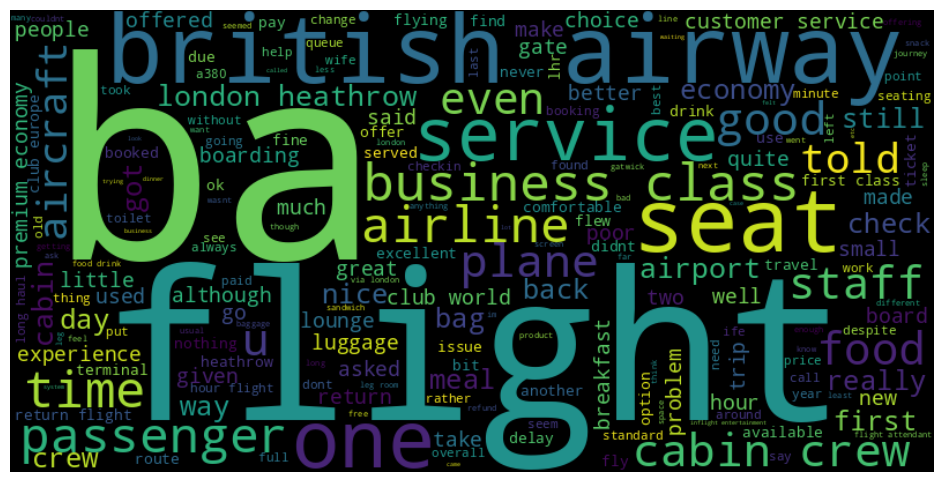

In [91]:
# Combine all cleaned words from the review into a single string
all_words = ' '.join([' '.join(tokens) for tokens in review_df['stemmed_tokens']])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_words)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Now we will try to see the most popular bigrams in our dataset

In [92]:
# Function to generate the most common bigrams

def generate_bigrams(tokens):
    return list(bigrams(tokens))

review_df['bigrams'] = review_df['stemmed_tokens'].apply(generate_bigrams)

all_bigrams = [bigram for sublist in review_df['bigrams'] for bigram in sublist]
bigram_counts = Counter(all_bigrams)

# Print the 10 most common bigrams
print(bigram_counts.most_common(20))


[(('british', 'airway'), 2188), (('business', 'class'), 1189), (('cabin', 'crew'), 929), (('london', 'heathrow'), 686), (('customer', 'service'), 525), (('premium', 'economy'), 396), (('club', 'world'), 396), (('return', 'flight'), 365), (('first', 'class'), 355), (('club', 'europe'), 320), (('hour', 'flight'), 309), (('could', 'not'), 268), (('long', 'haul'), 259), (('flight', 'attendant'), 252), (('leg', 'room'), 234), (('food', 'drink'), 233), (('via', 'london'), 213), (('inflight', 'entertainment'), 210), (('fly', 'ba'), 195), (('flight', 'delayed'), 194)]


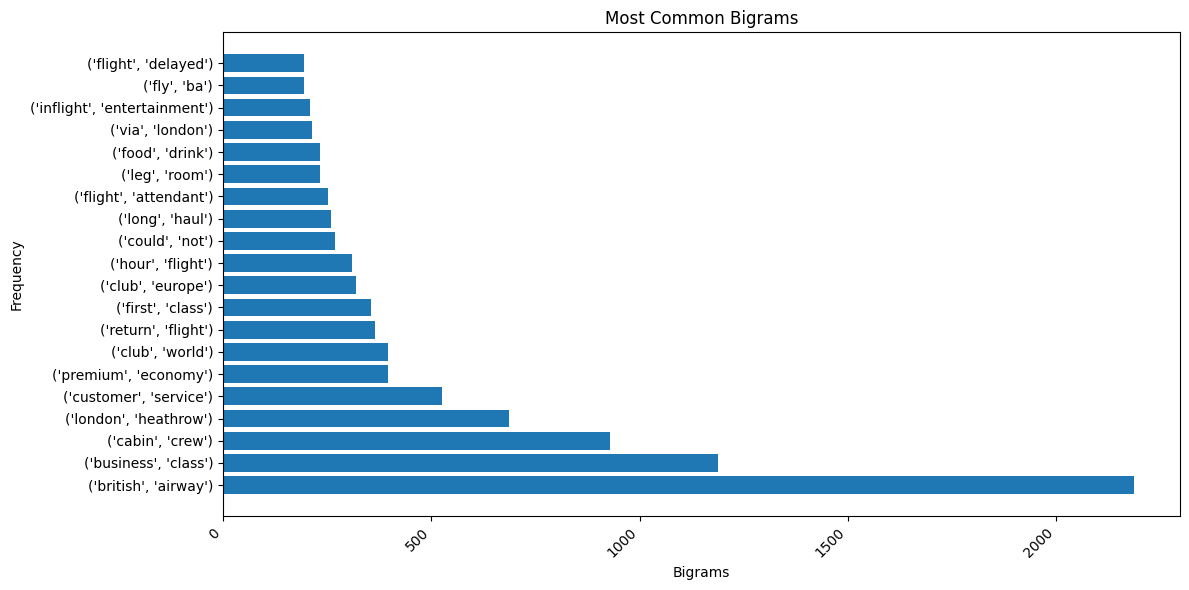

In [93]:
# Visualize the most common bigrams
most_common_bigrams = bigram_counts.most_common(20)

# Extract bigrams and their counts for plotting
bigrams_list = [bigram for bigram, count in most_common_bigrams]
counts_list_b = [count for bigram, count in most_common_bigrams]

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.barh([str(bigram) for bigram in bigrams_list], counts_list_b)
plt.xlabel("Bigrams")
plt.ylabel("Frequency")
plt.title("Most Common Bigrams")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [94]:
# Function to generate the most common trigrams

def generate_trigrams(tokens):
    return list(trigrams(tokens))

review_df['trigrams'] = review_df['stemmed_tokens'].apply(generate_trigrams)

all_trigrams = [trigram for sublist in review_df['trigrams'] for trigram in sublist]
trigram_counts = Counter(all_trigrams)

# Print the 20 most common trigrams
print(trigram_counts.most_common(20))


[(('business', 'class', 'seat'), 110), (('british', 'airway', 'flight'), 99), (('flew', 'british', 'airway'), 99), (('long', 'haul', 'flight'), 87), (('world', 'traveller', 'plus'), 86), (('fly', 'british', 'airway'), 81), (('heathrow', 'british', 'airway'), 73), (('flight', 'british', 'airway'), 64), (('via', 'london', 'heathrow'), 58), (('flying', 'british', 'airway'), 56), (('british', 'airway', 'not'), 56), (('ba', 'customer', 'service'), 54), (('business', 'class', 'passenger'), 50), (('low', 'cost', 'airline'), 48), (('london', 'heathrow', 'british'), 48), (('london', 'british', 'airway'), 46), (('short', 'haul', 'flight'), 46), (('ba', 'business', 'class'), 45), (('british', 'airway', 'business'), 43), (('cabin', 'crew', 'friendly'), 42)]


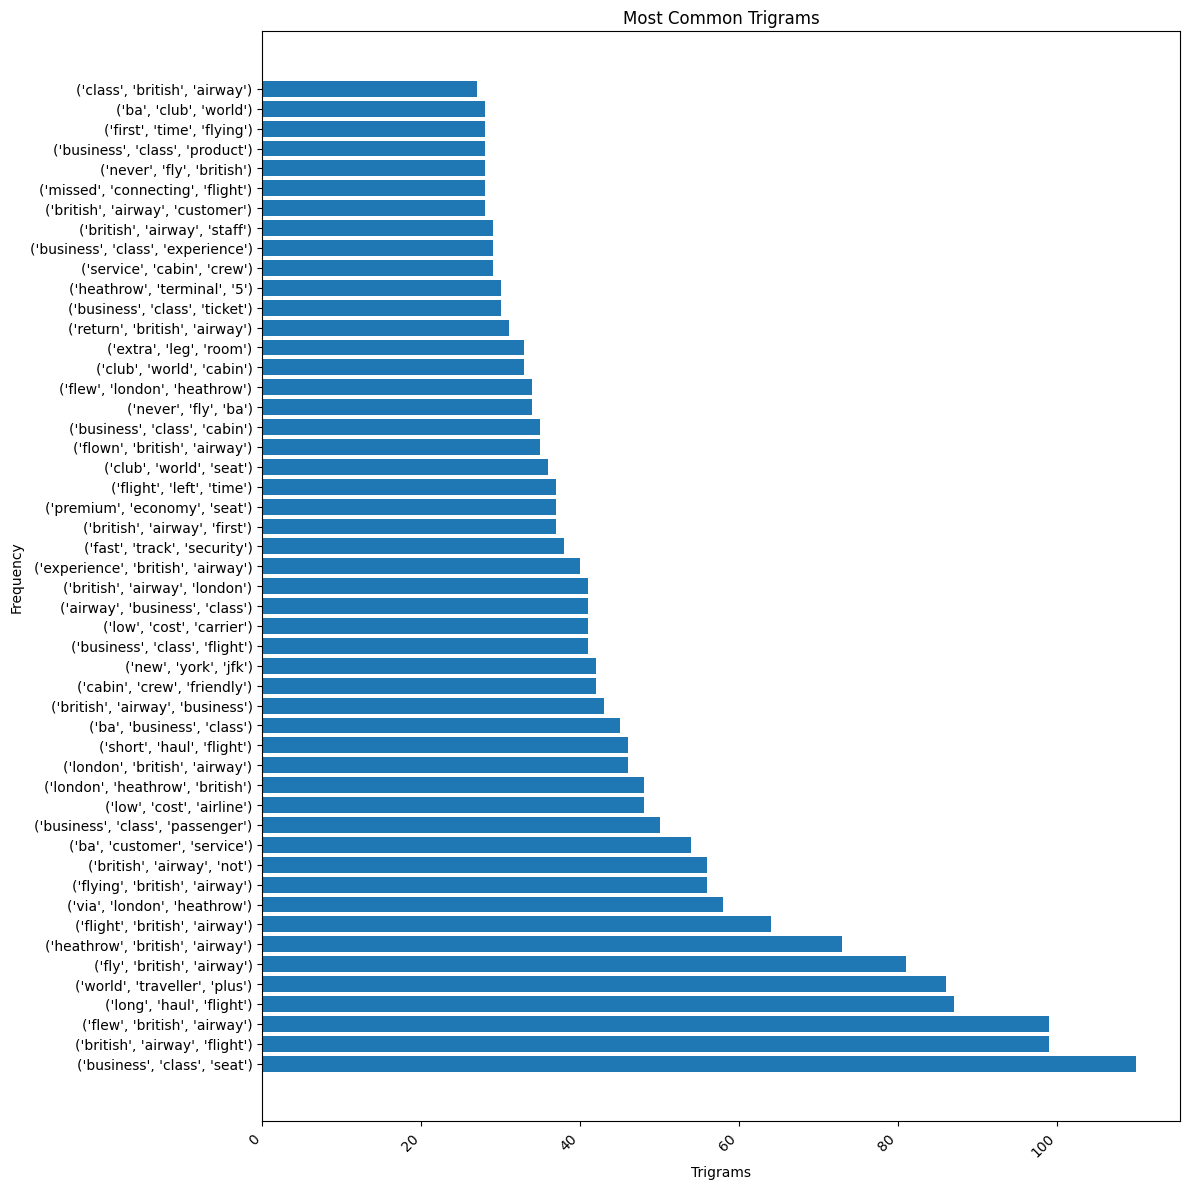

In [95]:
# Visualize the most common bigrams
most_common_trigrams = trigram_counts.most_common(50)

# Extract bigrams and their counts for plotting
trigrams_list = [trigram for trigram, count in most_common_trigrams]
counts_list_t = [count for trigram, count in most_common_trigrams]

# Create a bar plot
plt.figure(figsize=(12, 12))
plt.barh([str(trigram) for trigram in trigrams_list], counts_list_t)
plt.xlabel("Trigrams")
plt.ylabel("Frequency")
plt.title("Most Common Trigrams")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


## Topic modelling
---

For further analysis, I will categorize the reviews into very common categories: customer service, delay, food, seating, entertainment, luggage, wifi, check-in

In [21]:
# pip install transformers torch pandas tqdm

from transformers import pipeline
from tqdm import tqdm

To ensure all bases are covered, I will set up 2 classifiers:
* Zero-shot classifier which will be the main classifier
* Rule-based classifier as a fallback incase the ain classifier does not assign any categories



In [22]:
#Define categories
categories = ["customer service",
              "booking and refund experience",
              "flight delay",
              "flight cancellations",
              "in-flight meal",
              "seat comfort",
              "entertainment options",
              "luggage",
              "wifi availability",
              "check-in process"]
threshold = 0.45

In [23]:
# Setting up rule based classifier
fallback_keywords = {
    "customer service": ["rude", "attendant", "staff", "service", "hung up"],
    "flight delay": ["delayed", "late", "waiting"],
    "in-flight meal": ["food", "meal", "snack", "dinner", "breakfast", "prosecco", 'water'],
    "seat comfort": ["seat", "legroom", "uncomfortable"],
    "entertainment options": ["entertainment", "movies", "screen"],
    "wifi availability": ["wifi", "internet", "connection"],
    "check-in process": ["check-in", "boarding", "gate"],
    "luggage": ["baggage", "luggage", "suitcase", "bag"],
    "flight cancellations": ["cancelled"],
    "booking and refund experience": ["vouchers", "refund", "payment issues", "ticket discount", "apply credit"]
}

def rule_based_classify(text):
    labels_found = []
    for label, keywords in fallback_keywords.items():
        for kw in keywords:
            if re.search(rf"\b{re.escape(kw)}", text.lower()):
                labels_found.append(label)
                break
    return labels_found

In [24]:
# Set up the zero-shot classifier
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Classification function
def classify_to_columns(text):
    result = classifier(text, candidate_labels=categories, multi_label=True)
    label_scores = dict(zip(result['labels'], result['scores']))
    final_cat = {label: int(label_scores.get(label, 0) > threshold) for label in categories}

    if sum(final_cat.values()) == 0:
        fallback_labels = rule_based_classify(text)
        final_cat = {label: int(label in fallback_labels) for label in categories}

    return final_cat

config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0


In [25]:
# Apply with progress bar
tqdm.pandas()
category_df = review_df["reviews"].progress_apply(classify_to_columns).apply(pd.Series)

100%|██████████| 3924/3924 [39:03<00:00,  1.67it/s]


                                             reviews  \
0       Flight mainly let down by a disagreeable ...   
1       Another awful experience by British Airwa...   
2       The service was rude, full of attitude to...   
3       This flight was a joke. There was four pe...   
4       This time British Airways managed to get ...   

                                              tokens  \
0  [flight, mainly, let, down, by, a, disagreeabl...   
1  [another, awful, experience, by, british, airw...   
2  [the, service, was, rude, full, of, attitude, ...   
3  [this, flight, was, a, joke, there, was, four,...   
4  [this, time, british, airways, managed, to, ge...   

                                        clean_tokens  \
0  [flight, mainly, let, disagreeable, flight, at...   
1  [another, awful, experience, british, airways,...   
2  [service, rude, full, attitude, food, poorly, ...   
3  [flight, joke, four, people, business, class, ...   
4  [time, british, airways, managed, get, ever

In [22]:
# Merge category columns into original DataFrame
review_df = pd.concat([review_df, category_df], axis=1)

# Save the result
review_df.to_json("categorized_reviews_binary.json", orient="records", lines=True)

# Preview the first few rows
review_df.head()

,reviews,tokens,clean_tokens,stemmed_tokens,bigrams,trigrams,customer service,booking and refund experience,flight delay,flight cancellations,in-flight meal,seat comfort,entertainment options,luggage,wifi availability,check-in process
0,Flight mainly let down by a disagreeable ...,"['flight', 'mainly', 'let', 'down', 'by', 'a',...","['flight', 'mainly', 'let', 'disagreeable', 'f...","['flight', 'mainly', 'let', 'disagreeable', 'f...","[('flight', 'mainly'), ('mainly', 'let'), ('le...","[('flight', 'mainly', 'let'), ('mainly', 'let'...",1,1,1,0,1,1,1,1,1,1
1,Another awful experience by British Airwa...,"['another', 'awful', 'experience', 'by', 'brit...","['another', 'awful', 'experience', 'british', ...","['another', 'awful', 'experience', 'british', ...","[('another', 'awful'), ('awful', 'experience')...","[('another', 'awful', 'experience'), ('awful',...",1,0,1,1,0,0,0,0,0,0
2,"The service was rude, full of attitude to...","['the', 'service', 'was', 'rude', 'full', 'of'...","['service', 'rude', 'full', 'attitude', 'food'...","['service', 'rude', 'full', 'attitude', 'food'...","[('service', 'rude'), ('rude', 'full'), ('full...","[('service', 'rude', 'full'), ('rude', 'full',...",1,0,0,0,1,0,0,0,0,0
3,This flight was a joke. There was four pe...,"['this', 'flight', 'was', 'a', 'joke', 'there'...","['flight', 'joke', 'four', 'people', 'business...","['flight', 'joke', 'four', 'people', 'business...","[('flight', 'joke'), ('joke', 'four'), ('four'...","[('flight', 'joke', 'four'), ('joke', 'four', ...",1,0,1,0,0,1,0,0,0,0
4,This time British Airways managed to get ...,"['this', 'time', 'british', 'airways', 'manage...","['time', 'british', 'airways', 'managed', 'get...","['time', 'british', 'airway', 'managed', 'get'...","[('time', 'british'), ('british', 'airway'), (...","[('time', 'british', 'airway'), ('british', 'a...",1,0,0,0,1,1,1,0,1,1


Reloading the dataset for further analysis

In [23]:
review_df = pd.read_json("categorized_reviews_binary.json", orient='records', lines=True)
review_df.head(3)

,reviews,tokens,clean_tokens,stemmed_tokens,bigrams,trigrams,customer service,booking and refund experience,flight delay,flight cancellations,in-flight meal,seat comfort,entertainment options,luggage,wifi availability,check-in process
0,Flight mainly let down by a disagreeable ...,"['flight', 'mainly', 'let', 'down', 'by', 'a',...","['flight', 'mainly', 'let', 'disagreeable', 'f...","['flight', 'mainly', 'let', 'disagreeable', 'f...","[('flight', 'mainly'), ('mainly', 'let'), ('le...","[('flight', 'mainly', 'let'), ('mainly', 'let'...",1,1,1,0,1,1,1,1,1,1
1,Another awful experience by British Airwa...,"['another', 'awful', 'experience', 'by', 'brit...","['another', 'awful', 'experience', 'british', ...","['another', 'awful', 'experience', 'british', ...","[('another', 'awful'), ('awful', 'experience')...","[('another', 'awful', 'experience'), ('awful',...",1,0,1,1,0,0,0,0,0,0
2,"The service was rude, full of attitude to...","['the', 'service', 'was', 'rude', 'full', 'of'...","['service', 'rude', 'full', 'attitude', 'food'...","['service', 'rude', 'full', 'attitude', 'food'...","[('service', 'rude'), ('rude', 'full'), ('full...","[('service', 'rude', 'full'), ('rude', 'full',...",1,0,0,0,1,0,0,0,0,0


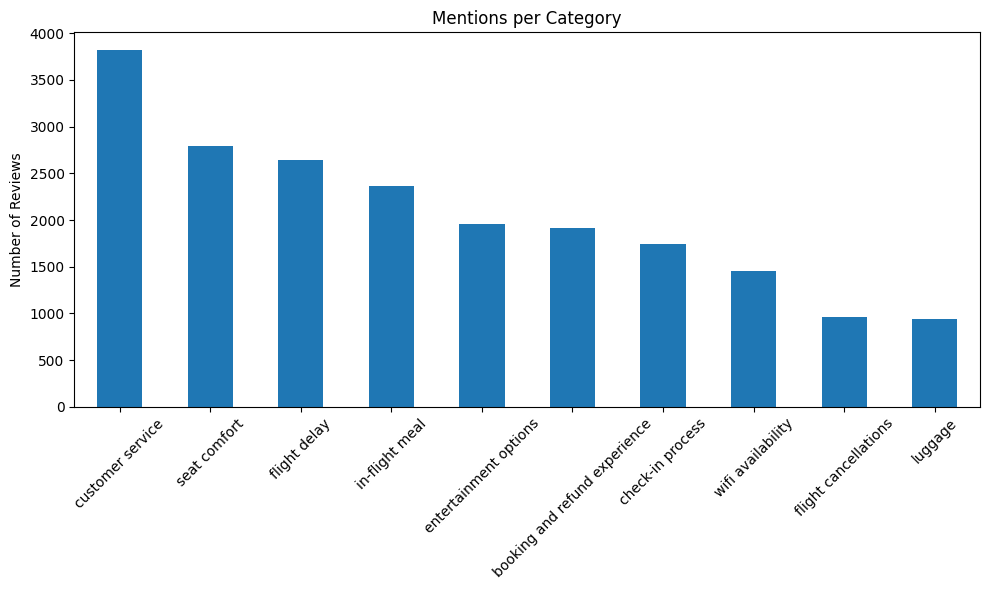

In [32]:
categories_cols = ["customer service",
              "booking and refund experience",
              "flight delay",
              "flight cancellations",
              "in-flight meal",
              "seat comfort",
              "entertainment options",
              "luggage",
              "wifi availability",
              "check-in process"]
review_df[categories_cols].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Mentions per Category')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

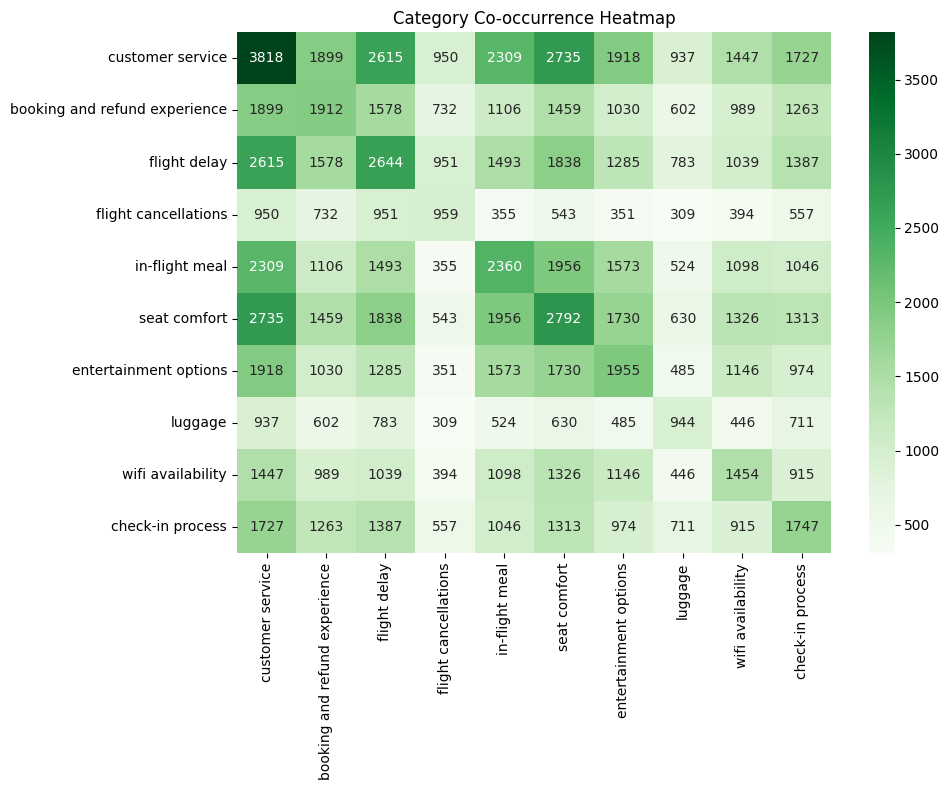

In [36]:
co_occurrence = review_df[categories_cols].T.dot(review_df[categories_cols])
plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence, annot=True, fmt='d', cmap='Greens')
plt.title('Category Co-occurrence Heatmap')
plt.tight_layout()
plt.show()


From just the assignment of categories, we can see what aspects of the experience has a larger impact on the customer
* Customers havee more to say about customer service, seat comfort and flight delays than anything else

## Sentiment Analysis using Vader

In [40]:
# Importing sentiment analyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [41]:
# Improving the lexicon by adding domain focused lexicon
airline_lexicon = {
     "delay": -2,
     "late": -2,
     "cancellation": -3,
     "rude staff": -2.5,
     "lost baggage": -3,
     "comfortable seats": 2,
     "excellent service": 3,
     "turbulence": -1.5,
}

In [42]:
sentiments = SentimentIntensityAnalyzer()
sentiments.lexicon.update(airline_lexicon)

In [45]:
#Applying ast to 'clean_tokens' column to correct for the string conversion that occurs after writing to csv
# review_df['clean_tokens'] = review_df['clean_tokens'].apply(ast.literal_eval)
review_df['stemmed_tokens'] = review_df['stemmed_tokens'].apply(ast.literal_eval)

In [47]:
review_df['cleaned_reviews'] = review_df['stemmed_tokens'].apply(lambda x: ' '.join(x))

In [49]:
review_df.head()

,reviews,tokens,clean_tokens,stemmed_tokens,bigrams,trigrams,customer service,booking and refund experience,flight delay,flight cancellations,in-flight meal,seat comfort,entertainment options,luggage,wifi availability,check-in process,cleaned_reviews
0,Flight mainly let down by a disagreeable ...,"['flight', 'mainly', 'let', 'down', 'by', 'a',...","[flight, mainly, let, disagreeable, flight, at...","[flight, mainly, let, disagreeable, flight, at...","[('flight', 'mainly'), ('mainly', 'let'), ('le...","[('flight', 'mainly', 'let'), ('mainly', 'let'...",1,1,1,0,1,1,1,1,1,1,flight mainly let disagreeable flight attendan...
1,Another awful experience by British Airwa...,"['another', 'awful', 'experience', 'by', 'brit...","[another, awful, experience, british, airways,...","[another, awful, experience, british, airway, ...","[('another', 'awful'), ('awful', 'experience')...","[('another', 'awful', 'experience'), ('awful',...",1,0,1,1,0,0,0,0,0,0,another awful experience british airway flight...
2,"The service was rude, full of attitude to...","['the', 'service', 'was', 'rude', 'full', 'of'...","[service, rude, full, attitude, food, poorly, ...","[service, rude, full, attitude, food, poorly, ...","[('service', 'rude'), ('rude', 'full'), ('full...","[('service', 'rude', 'full'), ('rude', 'full',...",1,0,0,0,1,0,0,0,0,0,service rude full attitude food poorly service...
3,This flight was a joke. There was four pe...,"['this', 'flight', 'was', 'a', 'joke', 'there'...","[flight, joke, four, people, business, class, ...","[flight, joke, four, people, business, class, ...","[('flight', 'joke'), ('joke', 'four'), ('four'...","[('flight', 'joke', 'four'), ('joke', 'four', ...",1,0,1,0,0,1,0,0,0,0,flight joke four people business class includi...
4,This time British Airways managed to get ...,"['this', 'time', 'british', 'airways', 'manage...","[time, british, airways, managed, get, everyth...","[time, british, airway, managed, get, everythi...","[('time', 'british'), ('british', 'airway'), (...","[('time', 'british', 'airway'), ('british', 'a...",1,0,0,0,1,1,1,0,1,1,time british airway managed get everything rig...


In [51]:
tqdm.pandas()

polarity_scores=review_df['cleaned_reviews'].progress_apply(lambda x: sentiments.polarity_scores(x))

  0%|          | 0/3924 [00:00<?, ?it/s]

In [52]:
# Convert to dataframe
pol_df = pd.DataFrame(polarity_scores.tolist())
review_df = pd.concat([review_df, pol_df], axis=1)

In [53]:
review_df.head()

,reviews,tokens,clean_tokens,stemmed_tokens,bigrams,trigrams,customer service,booking and refund experience,flight delay,flight cancellations,...,seat comfort,entertainment options,luggage,wifi availability,check-in process,cleaned_reviews,neg,neu,pos,compound
0,Flight mainly let down by a disagreeable ...,"['flight', 'mainly', 'let', 'down', 'by', 'a',...","[flight, mainly, let, disagreeable, flight, at...","[flight, mainly, let, disagreeable, flight, at...","[('flight', 'mainly'), ('mainly', 'let'), ('le...","[('flight', 'mainly', 'let'), ('mainly', 'let'...",1,1,1,0,...,1,1,1,1,1,flight mainly let disagreeable flight attendan...,0.143,0.720,0.137,0.4588
1,Another awful experience by British Airwa...,"['another', 'awful', 'experience', 'by', 'brit...","[another, awful, experience, british, airways,...","[another, awful, experience, british, airway, ...","[('another', 'awful'), ('awful', 'experience')...","[('another', 'awful', 'experience'), ('awful',...",1,0,1,1,...,0,0,0,0,0,another awful experience british airway flight...,0.375,0.625,0.000,-0.8126
2,"The service was rude, full of attitude to...","['the', 'service', 'was', 'rude', 'full', 'of'...","[service, rude, full, attitude, food, poorly, ...","[service, rude, full, attitude, food, poorly, ...","[('service', 'rude'), ('rude', 'full'), ('full...","[('service', 'rude', 'full'), ('rude', 'full',...",1,0,0,0,...,0,0,0,0,0,service rude full attitude food poorly service...,0.200,0.800,0.000,-0.4588
3,This flight was a joke. There was four pe...,"['this', 'flight', 'was', 'a', 'joke', 'there'...","[flight, joke, four, people, business, class, ...","[flight, joke, four, people, business, class, ...","[('flight', 'joke'), ('joke', 'four'), ('four'...","[('flight', 'joke', 'four'), ('joke', 'four', ...",1,0,1,0,...,1,0,0,0,0,flight joke four people business class includi...,0.125,0.708,0.167,0.0000
4,This time British Airways managed to get ...,"['this', 'time', 'british', 'airways', 'manage...","[time, british, airways, managed, get, everyth...","[time, british, airway, managed, get, everythi...","[('time', 'british'), ('british', 'airway'), (...","[('time', 'british', 'airway'), ('british', 'a...",1,0,0,0,...,1,1,0,1,1,time british airway managed get everything rig...,0.000,0.612,0.388,0.9831


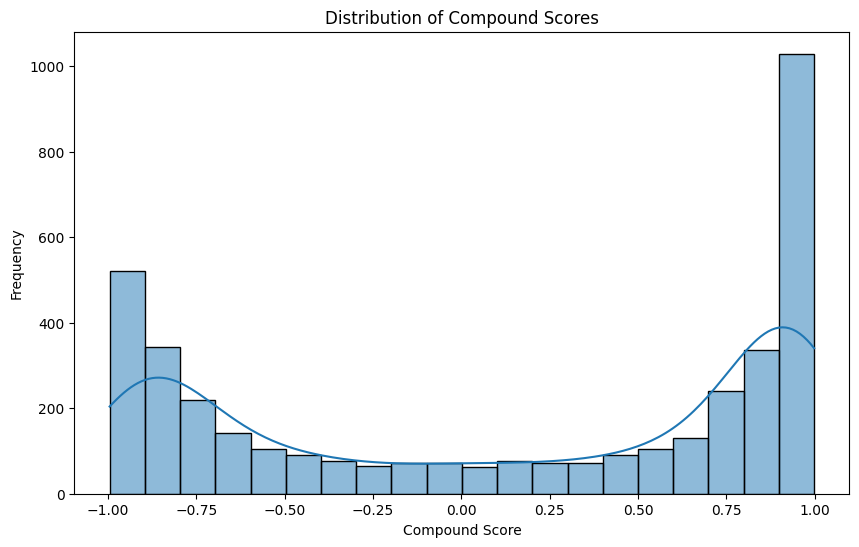

In [54]:
# Plot compound score distribution

plt.figure(figsize=(10, 6))
sns.histplot(review_df['compound'], bins=20, kde=True)
plt.title('Distribution of Compound Scores')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.show()


## Sentiment Analysis with Roberta

In [55]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

In [56]:
# Load the model
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [57]:
# Write a function to extract polarity scores from roberta

def polarity_scores_r(review):
    encoded_text = tokenizer(review, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'neg_r': scores[0],
        'neu_r': scores[1],
        'pos_r': scores[2]
    }
    return scores_dict

In [ ]:
tqdm.pandas()

roberta_scores = review_df['cleaned_reviews'].progress_apply(lambda x: polarity_scores_r(x))

  0%|          | 0/3924 [00:00<?, ?it/s]

In [ ]:
roberta_scores

In [ ]:
# Convert to dataframe
rob_df = pd.DataFrame(roberta_scores.tolist())
review_df = pd.concat([review_df, rob_df], axis=1)

In [ ]:
review_df.head()

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.histplot(review_df['neg_r'], bins=20, kde=True, ax=axs[0])
sns.histplot(review_df['pos_r'], bins=20, kde=True, ax=axs[1])
sns.histplot(review_df['neu_r'], bins=20, kde=True, ax=axs[2])
axs[1].set_title('Positive')
axs[2].set_title('Neutral')
axs[0].set_title('Negative')
plt.tight_layout()
plt.title('Distribution of Polarity Scores')
# plt.xlabel('Compound Score')
# plt.ylabel('Frequency')
plt.show()

## Visualization

Let us classify each sentiment into a negative, positive or neutral sentiment

In [ ]:
review_df['sentiment'] = review_df['compound'].apply(lambda x: 'Positive' if x >= 0.05 else ('Negative' if x <= -0.05 else 'Neutral'))

In [ ]:
review_df.iloc[4].reviews

'  \xa0 \xa0This time British Airways managed to get everything right. The price of the tickets was reasonable and the timing was perfect. Boarding was smooth and the seats were comfortable – easy reline to enable dozing and sufficient pitch to get in and out. The table was firm enough to allow the use of a small laptop and mouse. A pre-flight soft drink or Prosecco was offered and both the food and drink were more than sufficient. The best part was the cabin crew – two in PE and they were both extremely efficient, pleasant and witty. There was a good selection of movies and both the screen and the headset worked perfectly.'

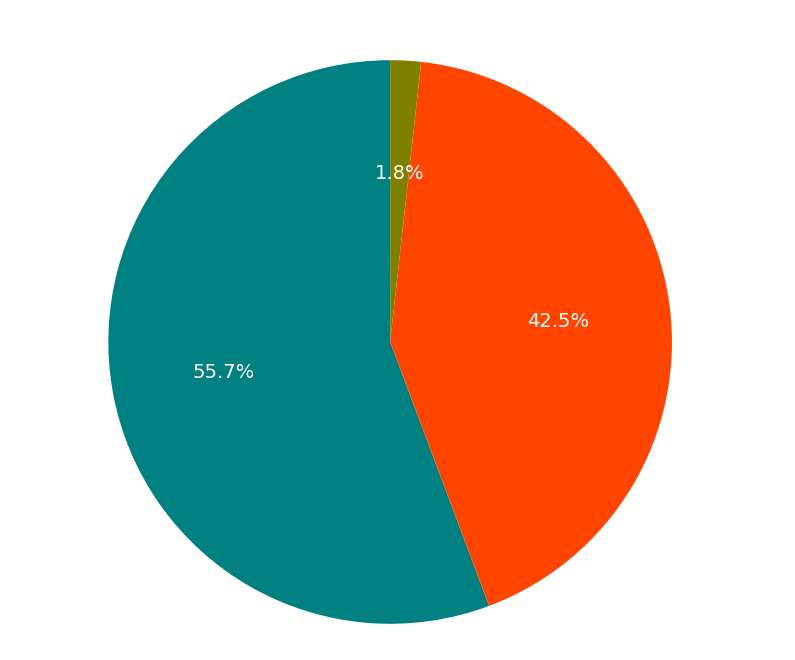

In [ ]:
#
sentiment_counts = review_df['sentiment'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90,
        colors=['teal', 'orangered', 'olive'], textprops={'fontsize': 14, 'color':'white'})
plt.title('Sentiment Distribution', fontsize=16, color='white')
plt.axis('equal')
plt.savefig('pie.png', transparent=True)
plt.show()

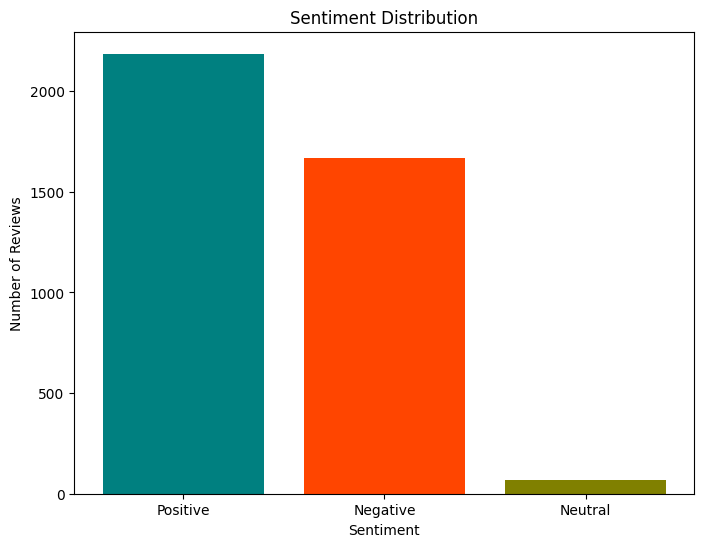

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color= ['teal', 'orangered', 'olive'])
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.savefig('bar.png', transparent=True)
plt.title("Sentiment Distribution")
plt.show()

Now, let us do a wordcloud of the bad reviews to figure out the key words

In [ ]:
bad_reviews = review_df[review_df['sentiment'] == 'Negative']

In [ ]:
bad_reviews.head(10)

,reviews,tokens,clean_tokens,cleaned_data,bigrams,trigrams,cleaned_reviews,neg,neu,pos,compound,sentiment
1,Another awful experience by British Airwa...,"[another, awful, experience, by, british, airw...","[another, awful, experience, british, airways,...","[another, awful, experience, british, airway, ...","[(another, awful), (awful, experience), (exper...","[(another, awful, experience), (awful, experie...",another awful experience british airway flight...,0.375,0.625,0.000,-0.8126,Negative
2,"The service was rude, full of attitude to...","[the, service, was, rude, full, of, attitude, ...","[service, rude, full, attitude, food, poorly, ...","[service, rude, full, attitude, food, poorly, ...","[(service, rude), (rude, full), (full, attitud...","[(service, rude, full), (rude, full, attitude)...",service rude full attitude food poorly service...,0.200,0.800,0.000,-0.4588,Negative
7,Prior to boarding a gate agent seemed to ...,"[prior, to, boarding, a, gate, agent, seemed, ...","[prior, boarding, gate, agent, seemed, pick, e...","[prior, boarding, gate, agent, seemed, pick, e...","[(prior, boarding), (boarding, gate), (gate, a...","[(prior, boarding, gate), (boarding, gate, age...",prior boarding gate agent seemed pick elderly ...,0.123,0.809,0.068,-0.8393,Negative
8,I flew from Amsterdam to Las Vegas with a...,"[i, flew, from, amsterdam, to, las, vegas, wit...","[flew, amsterdam, las, vegas, layover, heathro...","[flew, amsterdam, la, vega, layover, heathrow,...","[(flew, amsterdam), (amsterdam, la), (la, vega...","[(flew, amsterdam, la), (amsterdam, la, vega),...",flew amsterdam la vega layover heathrow novemb...,0.117,0.809,0.073,-0.8657,Negative
11,"Terrible overall, medium service and the fl...","[terrible, overall, medium, service, and, the,...","[terrible, overall, medium, service, flight, d...","[terrible, overall, medium, service, flight, d...","[(terrible, overall), (overall, medium), (medi...","[(terrible, overall, medium), (overall, medium...",terrible overall medium service flight delayed...,0.347,0.471,0.182,-0.5994,Negative
15,I booked through BA because Loganair don’...,"[i, booked, through, ba, because, loganair, do...","[booked, ba, loganair, dont, representatives, ...","[booked, ba, loganair, dont, representative, m...","[(booked, ba), (ba, loganair), (loganair, dont...","[(booked, ba, loganair), (ba, loganair, dont),...",booked ba loganair dont representative manches...,0.179,0.723,0.098,-0.5245,Negative
16,British airways lost bags in LHR then fou...,"[british, airways, lost, bags, in, lhr, then, ...","[british, airways, lost, bags, lhr, found, sen...","[british, airway, lost, bag, lhr, found, sent,...","[(british, airway), (airway, lost), (lost, bag...","[(british, airway, lost), (airway, lost, bag),...",british airway lost bag lhr found sent cologne...,0.114,0.886,0.000,-0.6908,Negative
17,The check in process and reward/loyalty pro...,"[the, check, in, process, and, rewardloyalty, ...","[check, process, rewardloyalty, program, mess,...","[check, process, rewardloyalty, program, mess,...","[(check, process), (process, rewardloyalty), (...","[(check, process, rewardloyalty), (process, re...",check process rewardloyalty program mess never...,0.286,0.714,0.000,-0.7003,Negative
18,"We flew in November 2023, but it took thi...","[we, flew, in, november, 2023, but, it, took, ...","[flew, november, 2023, took, long, seek, satis...","[flew, november, 2023, took, long, seek, satis...","[(flew, november), (november, 2023), (2023, to...","[(flew, november, 2023), (november, 2023, took...",flew november 2023 took long seek satisfactory...,0.190,0.715,0.095,-0.5280,Negative
19,I left for London from Johannesburg at 21:1...,"[i, left, for, london, from, johannesburg, at,...","[left, london, johannesburg, 2115, 22, decembe...","[left, london, johannesburg, 2115, 22, decembe...","[(left, london), (london, johannesburg), (joha...","[(left, london, johannesburg), (london, johann...",left london johannesburg 2115 22 december

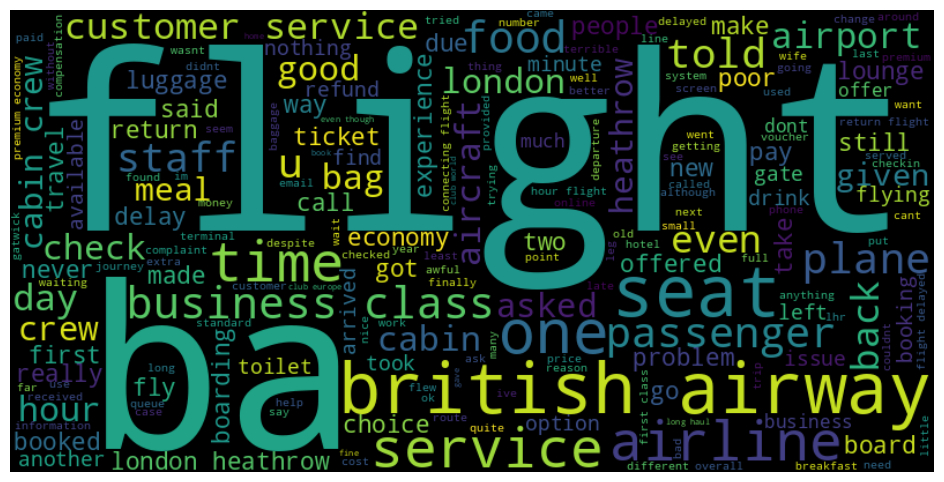

In [ ]:
# Combine all cleaned tokens into a single string
bad_review_words = ' '.join([' '.join(tokens) for tokens in bad_reviews['cleaned_data']])

# Generate the word cloud
bad_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(bad_review_words)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(bad_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()